In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('app_data.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: 'app_data.xlsx'

In [3]:
df.head()

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Management,Severity,Diagnosis_Presumptive,Diagnosis,...,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings
0,12.68,16.9,female,148.0,37.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.10,31.9,male,147.0,69.5,2.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN
2,14.14,23.3,female,163.0,62.0,4.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,NaN
3,16.37,20.6,female,165.0,56.0,3.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN
4,11.08,16.9,female,163.0,45.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN


In [4]:
df.columns

Index(['Age', 'BMI', 'Sex', 'Height', 'Weight', 'Length_of_Stay', 'Management',
       'Severity', 'Diagnosis_Presumptive', 'Diagnosis', 'Alvarado_Score',
       'Paedriatic_Appendicitis_Score', 'Appendix_on_US', 'Appendix_Diameter',
       'Migratory_Pain', 'Lower_Right_Abd_Pain',
       'Contralateral_Rebound_Tenderness', 'Coughing_Pain', 'Nausea',
       'Loss_of_Appetite', 'Body_Temperature', 'WBC_Count',
       'Neutrophil_Percentage', 'Segmented_Neutrophils', 'Neutrophilia',
       'RBC_Count', 'Hemoglobin', 'RDW', 'Thrombocyte_Count',
       'Ketones_in_Urine', 'RBC_in_Urine', 'WBC_in_Urine', 'CRP', 'Dysuria',
       'Stool', 'Peritonitis', 'Psoas_Sign', 'Ipsilateral_Rebound_Tenderness',
       'US_Performed', 'US_Number', 'Free_Fluids', 'Appendix_Wall_Layers',
       'Target_Sign', 'Appendicolith', 'Perfusion', 'Perforation',
       'Surrounding_Tissue_Reaction', 'Appendicular_Abscess',
       'Abscess_Location', 'Pathological_Lymph_Nodes', 'Lymph_Nodes_Location',
       'Bowel

In [5]:
df = df[['Age', 'Sex', 'Height', 'Weight', 'Body_Temperature', 'Coughing_Pain', 'Migratory_Pain', 'Loss_of_Appetite', 'Nausea', 'Lower_Right_Abd_Pain', 'Diagnosis']]
df.head()

,Age,Sex,Height,Weight,Body_Temperature,Coughing_Pain,Migratory_Pain,Loss_of_Appetite,Nausea,Lower_Right_Abd_Pain,Diagnosis
0,12.68,female,148.0,37.0,37.0,no,no,yes,no,yes,appendicitis
1,14.10,male,147.0,69.5,36.9,no,yes,yes,no,yes,no appendicitis
2,14.14,female,163.0,62.0,36.6,no,no,no,no,yes,no appendicitis
3,16.37,female,165.0,56.0,36.0,no,yes,yes,yes,yes,no appendicitis
4,11.08,female,163.0,45.0,36.9,yes,no,yes,yes,yes,appendicitis


In [6]:
map = {'yes': 1, 'no': 0}
gender = {'male': 1, 'female': 0}
appendicitis = {'appendicitis': 1, 'no appendicitis': 0}
df['Coughing_Pain'] = df['Coughing_Pain'].map(map)
df['Migratory_Pain'] = df['Migratory_Pain'].map(map)
df['Loss_of_Appetite'] = df['Loss_of_Appetite'].map(map)
df['Nausea'] = df['Nausea'].map(map)
df['Lower_Right_Abd_Pain'] = df['Lower_Right_Abd_Pain'].map(map)
df['Sex'] = df['Sex'].map(gender)
df['Diagnosis'] = df['Diagnosis'].map(appendicitis)
df.head()

,Age,Sex,Height,Weight,Body_Temperature,Coughing_Pain,Migratory_Pain,Loss_of_Appetite,Nausea,Lower_Right_Abd_Pain,Diagnosis
0,12.68,0.0,148.0,37.0,37.0,0.0,0.0,1.0,0.0,1.0,1.0
1,14.10,1.0,147.0,69.5,36.9,0.0,1.0,1.0,0.0,1.0,0.0
2,14.14,0.0,163.0,62.0,36.6,0.0,0.0,0.0,0.0,1.0,0.0
3,16.37,0.0,165.0,56.0,36.0,0.0,1.0,1.0,1.0,1.0,0.0
4,11.08,0.0,163.0,45.0,36.9,1.0,0.0,1.0,1.0,1.0,1.0


In [7]:
df.isnull().sum()

Age                      1
Sex                      2
Height                  26
Weight                   3
Body_Temperature         7
Coughing_Pain           16
Migratory_Pain           9
Loss_of_Appetite        10
Nausea                   8
Lower_Right_Abd_Pain     8
Diagnosis                2
dtype: int64

In [8]:
df.dropna(inplace=True)
df.describe()

,Age,Sex,Height,Weight,Body_Temperature,Coughing_Pain,Migratory_Pain,Loss_of_Appetite,Nausea,Lower_Right_Abd_Pain,Diagnosis
count,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000
mean,11.337861,0.514170,148.044804,43.307976,37.410121,0.283401,0.268556,0.492578,0.578947,0.947368,0.580297
std,3.515832,0.500137,19.672310,17.439893,0.909837,0.450954,0.443508,0.500283,0.494061,0.223448,0.493844
min,0.000000,0.000000,53.000000,3.960000,26.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.237509,0.000000,137.000000,30.000000,36.800000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,11.416838,1.000000,149.500000,41.200000,37.200000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,13.987680,1.000000,163.000000,55.000000,37.900000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,17.872690,1.000000,192.000000,103.000000,40.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


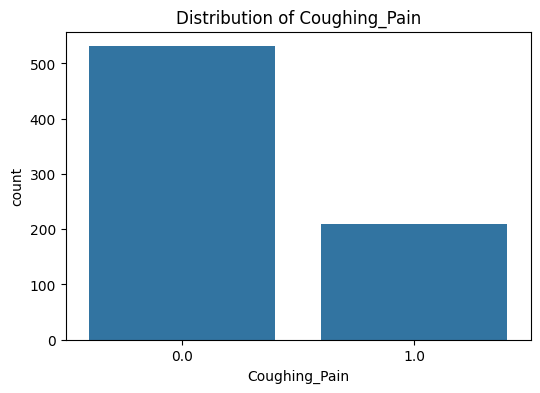

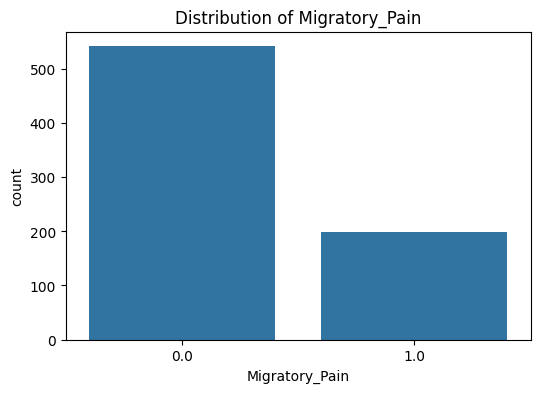

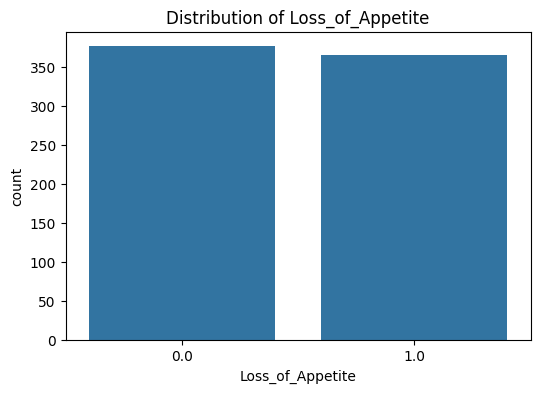

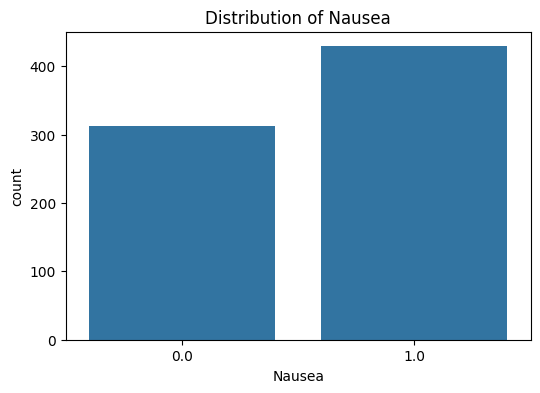

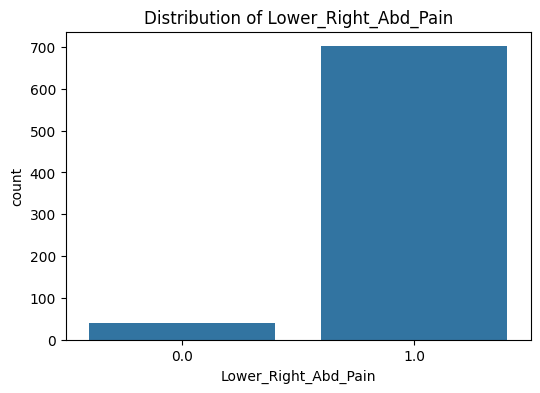

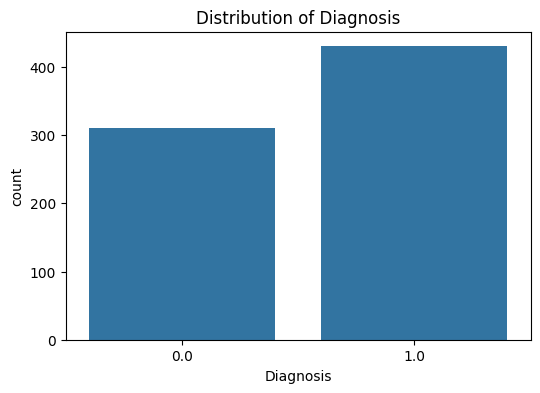

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot categorical features (e.g., 'Coughing_Pain', 'Migratory_Pain', 'Loss_of_Appetite', 'Nausea')
categorical_cols = ['Coughing_Pain', 'Migratory_Pain', 'Loss_of_Appetite', 'Nausea', 'Lower_Right_Abd_Pain', 'Diagnosis']
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()


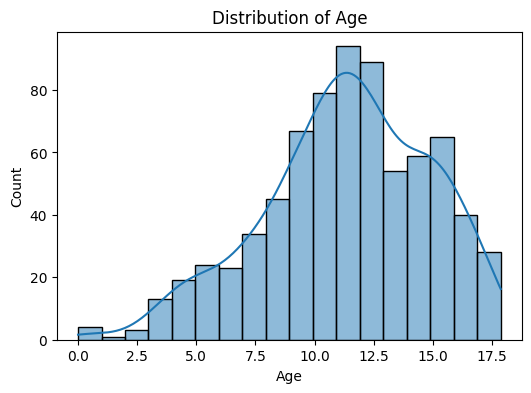

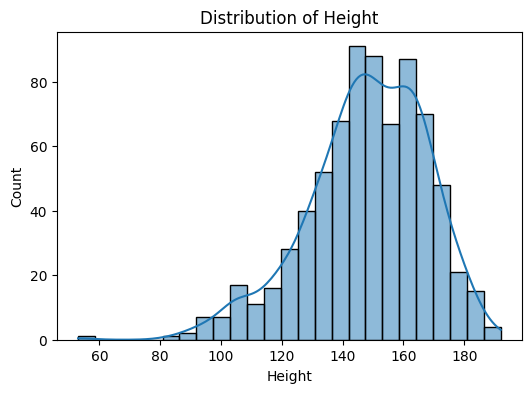

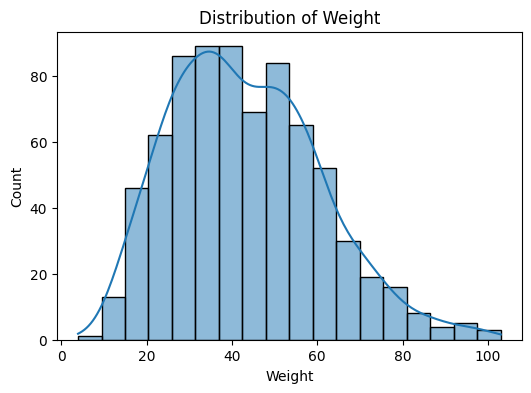

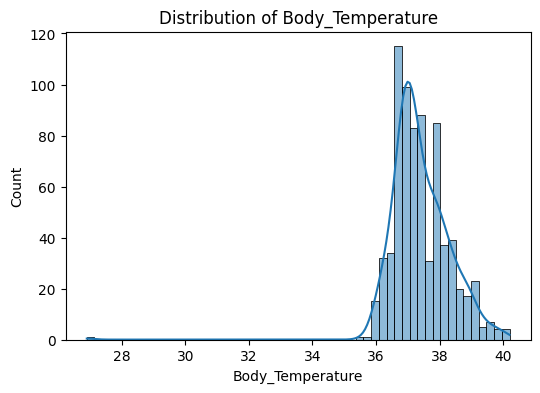

In [10]:
# Histograms for continuous columns
continuous_cols = ['Age', 'Height', 'Weight', 'Body_Temperature']
for col in continuous_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


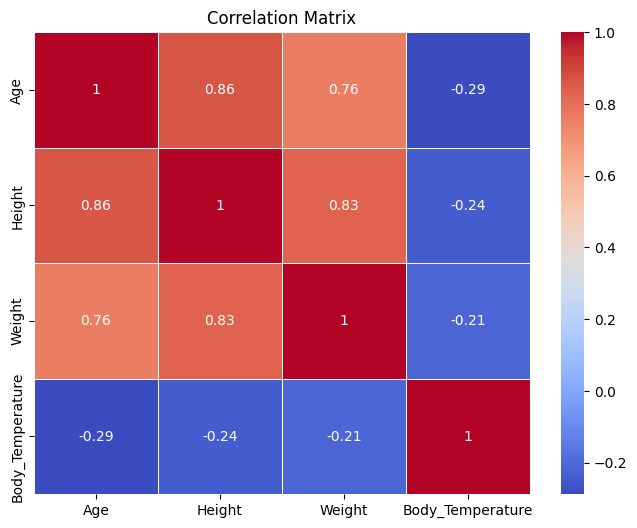

In [11]:
# Correlation matrix
corr = df[continuous_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


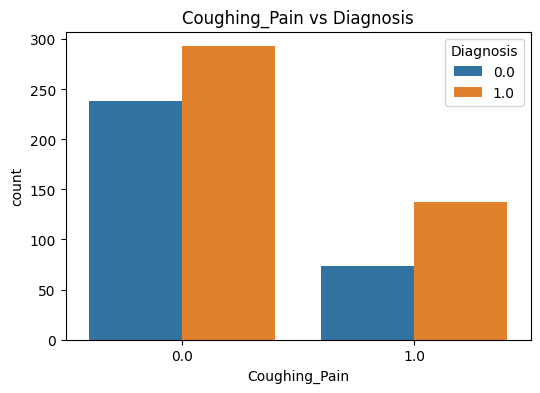

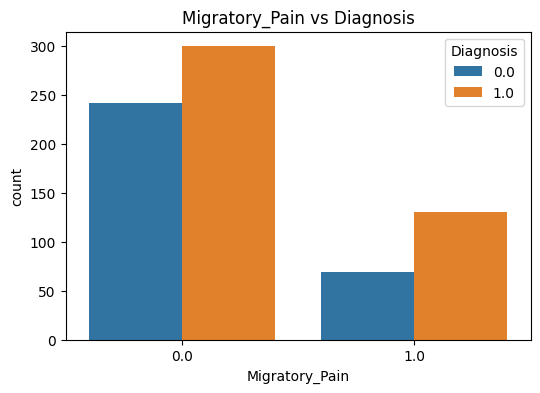

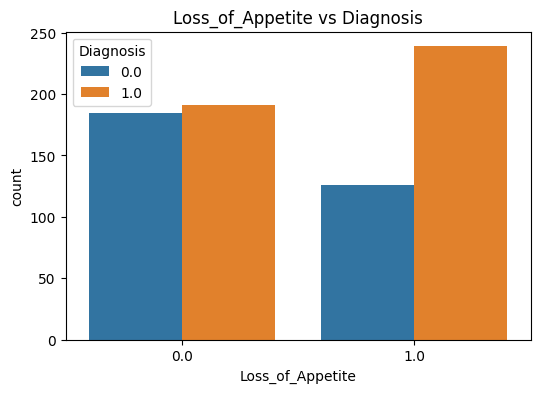

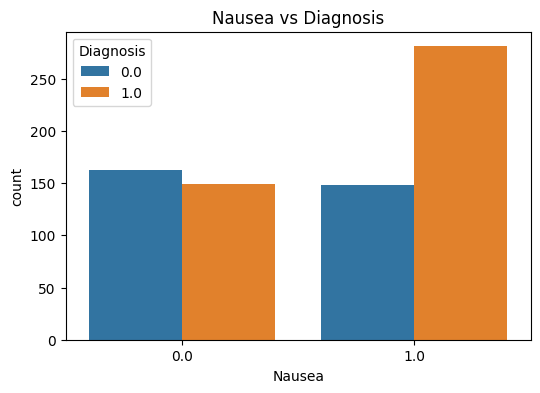

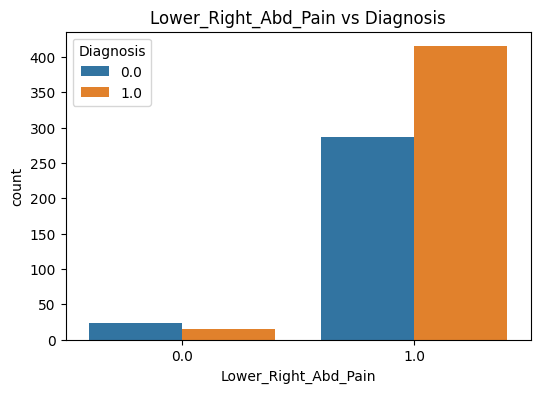

In [12]:
# Compare binary columns with Diagnosis (grouped bar plot)
for col in categorical_cols[:-1]:  # Exclude 'Diagnosis' column itself
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='Diagnosis', data=df)
    plt.title(f'{col} vs Diagnosis')
    plt.show()


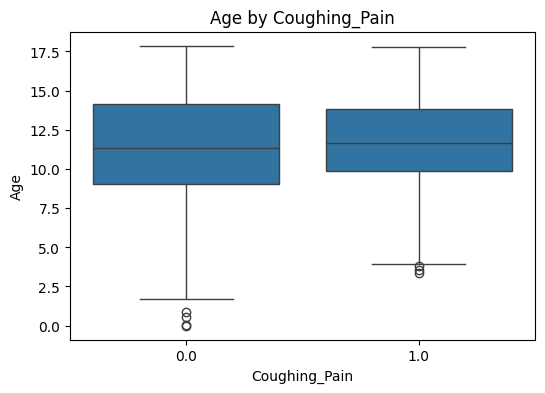

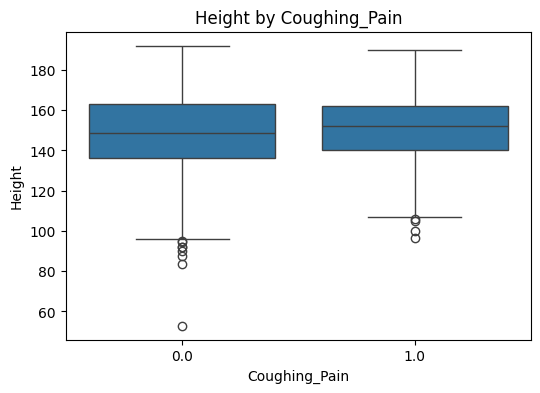

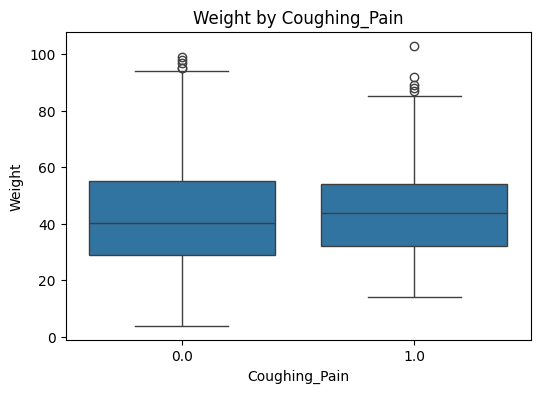

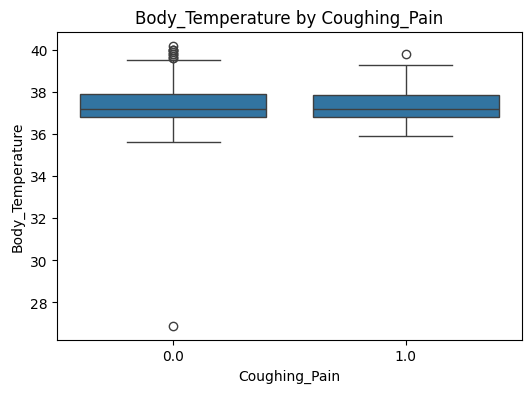

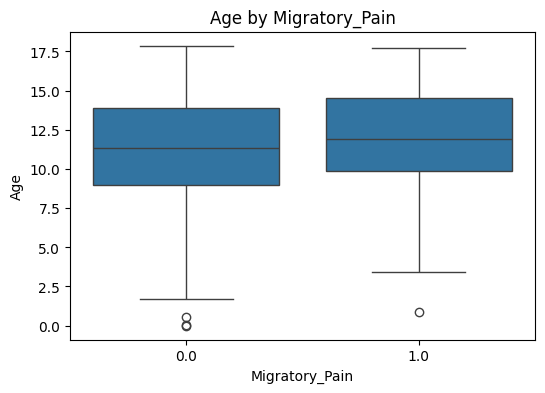

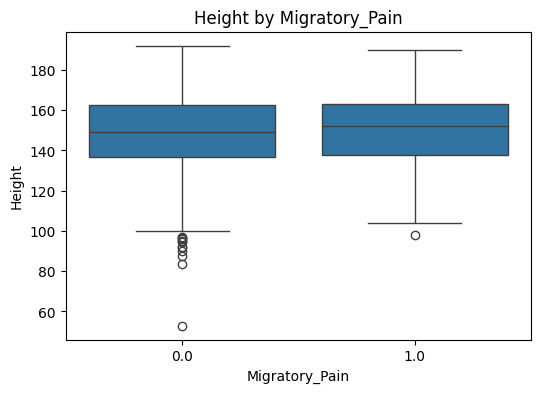

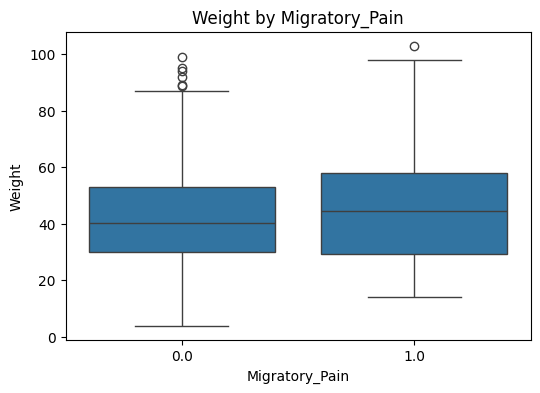

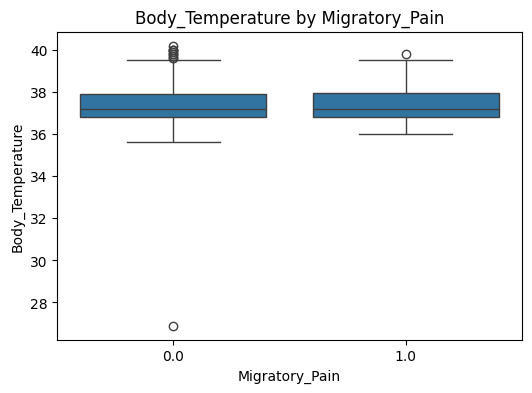

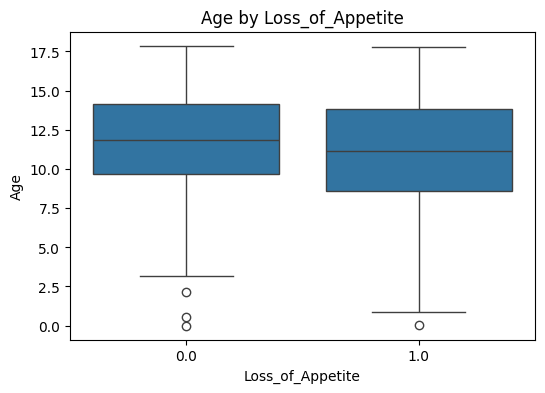

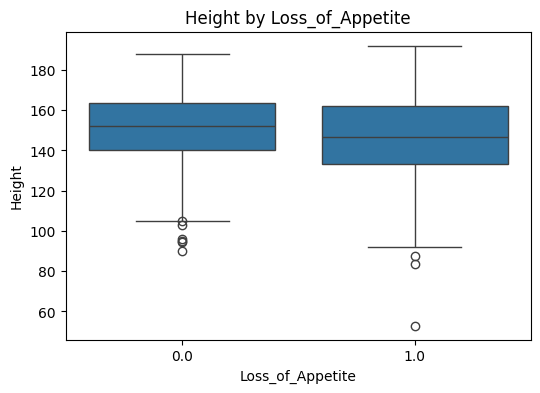

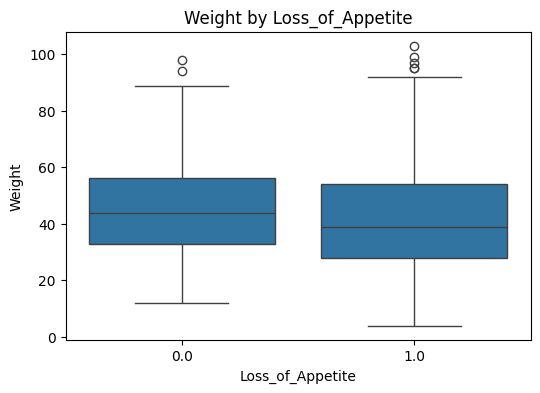

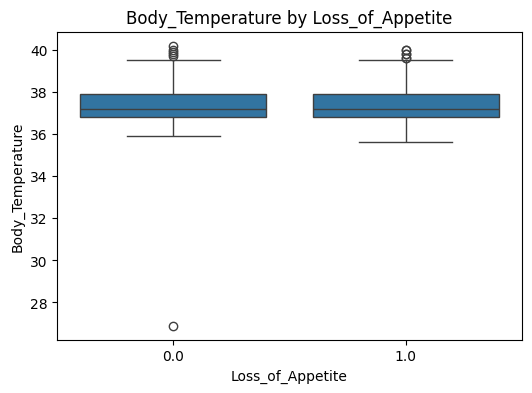

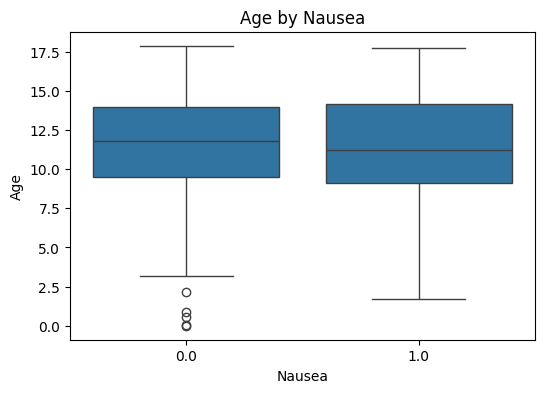

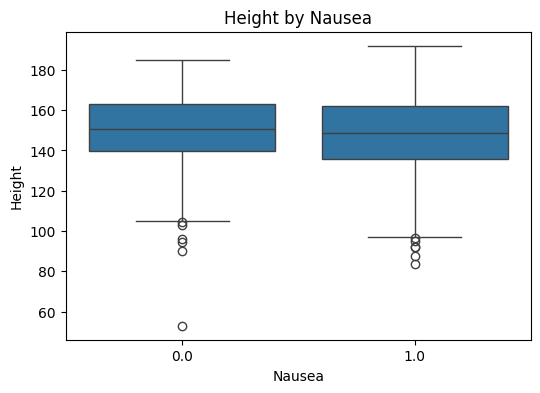

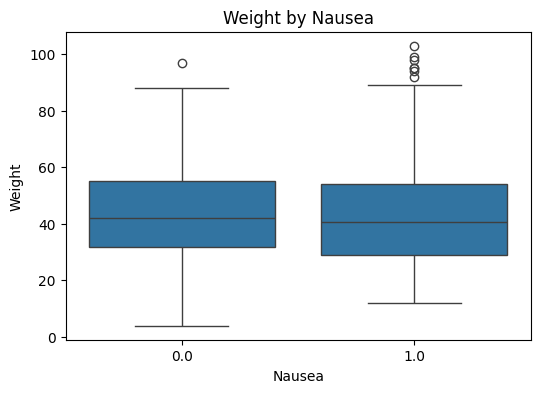

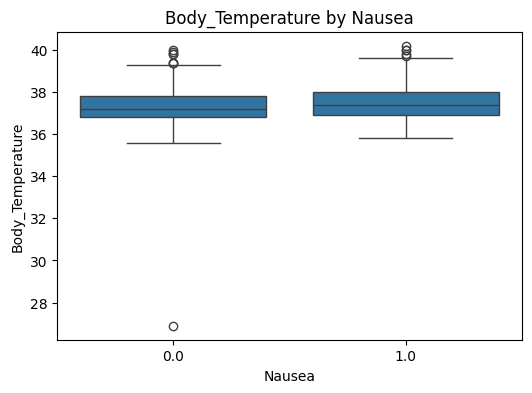

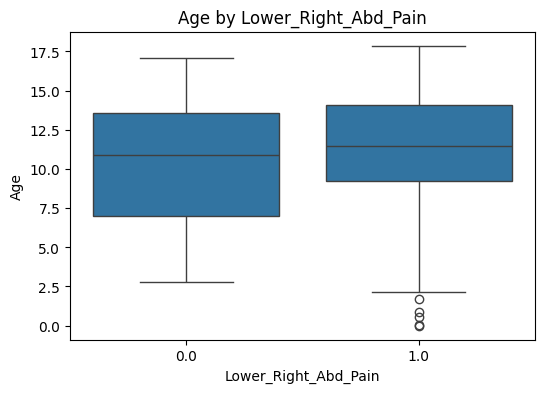

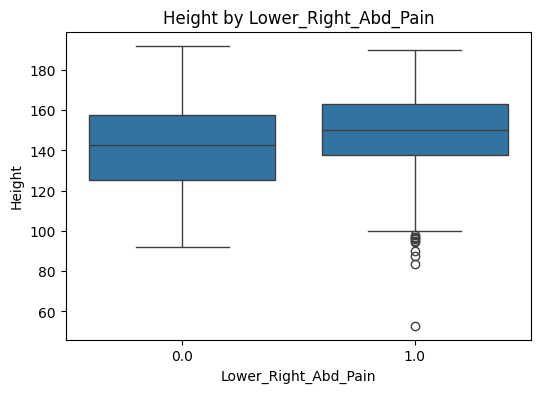

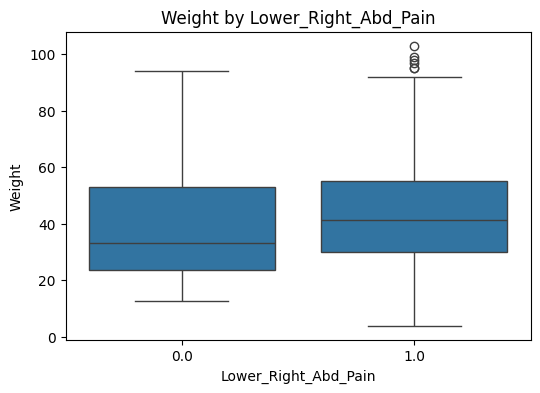

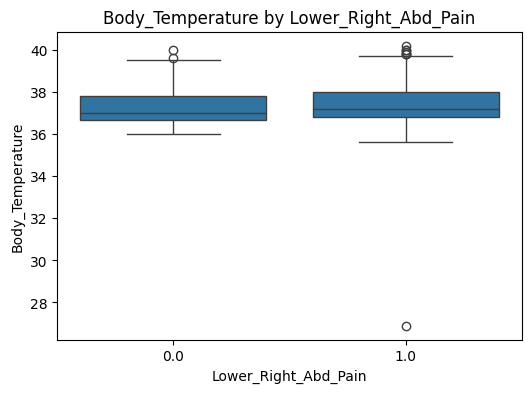

In [13]:
# Box plots of continuous variables by binary feature (e.g., 'Age' by 'Coughing_Pain')
for col in categorical_cols[:-1]:  # Exclude 'Diagnosis'
    for cont_col in ['Age', 'Height', 'Weight', 'Body_Temperature']:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=col, y=cont_col, data=df)
        plt.title(f'{cont_col} by {col}')
        plt.show()


In [14]:
from scipy.stats import pointbiserialr

# Calculate point-biserial correlation for each continuous column with each binary column
for col in categorical_cols[:-1]:  # Exclude 'Diagnosis'
    for cont_col in ['Age', 'Height', 'Weight', 'Body_Temperature']:
        corr, _ = pointbiserialr(df[col], df[cont_col])
        print(f'Correlation between {col} and {cont_col}: {corr:.2f}')


Correlation between Coughing_Pain and Age: 0.04
Correlation between Coughing_Pain and Height: 0.04
Correlation between Coughing_Pain and Weight: 0.03
Correlation between Coughing_Pain and Body_Temperature: -0.02
Correlation between Migratory_Pain and Age: 0.08
Correlation between Migratory_Pain and Height: 0.07
Correlation between Migratory_Pain and Weight: 0.08
Correlation between Migratory_Pain and Body_Temperature: -0.02
Correlation between Loss_of_Appetite and Age: -0.09
Correlation between Loss_of_Appetite and Height: -0.10
Correlation between Loss_of_Appetite and Weight: -0.09
Correlation between Loss_of_Appetite and Body_Temperature: -0.01
Correlation between Nausea and Age: -0.04
Correlation between Nausea and Height: -0.04
Correlation between Nausea and Weight: -0.03
Correlation between Nausea and Body_Temperature: 0.13
Correlation between Lower_Right_Abd_Pain and Age: 0.07
Correlation between Lower_Right_Abd_Pain and Height: 0.09
Correlation between Lower_Right_Abd_Pain and W

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Prepare features and target
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

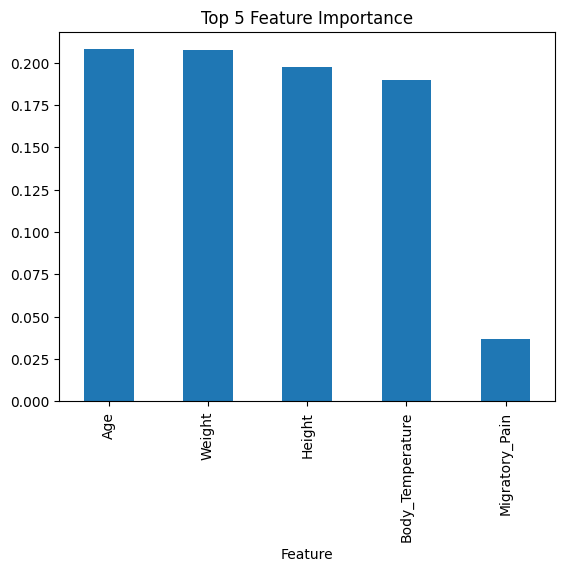

Model Accuracy: 59.73%


In [16]:
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

# Plot feature importances
feature_importances = rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the top features
importance_df.head(5).plot(kind='bar', x='Feature', y='Importance', legend=False)
plt.title('Top 5 Feature Importance')
plt.show()

print(f"Model Accuracy: {accuracy * 100:.2f}%")

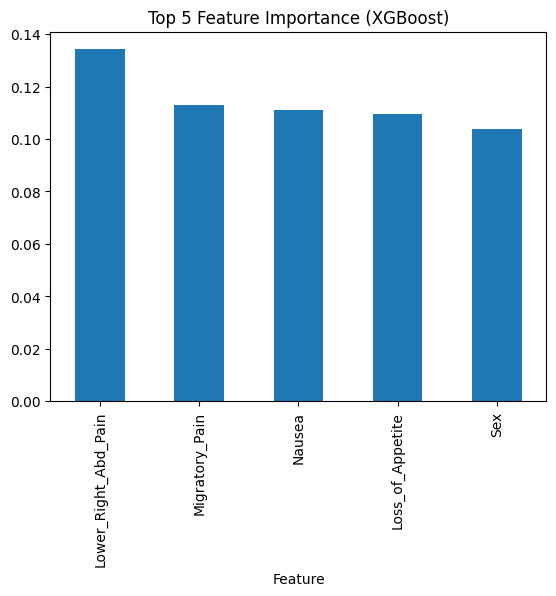

Model Accuracy: 60.40%


In [17]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
# Train an XGBoost classifier
xgb_model = xgb.XGBClassifier(n_estimators=100)
xgb_model.fit(x_train, y_train)

# Make predictions and calculate accuracy
y_pred = xgb_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

# Plot feature importances
feature_importances = xgb_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the top features
importance_df.head(5).plot(kind='bar', x='Feature', y='Importance', legend=False)
plt.title('Top 5 Feature Importance (XGBoost)')
plt.show()

# Print the accuracy
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Optimization terminated successfully.
         Current function value: 0.676309
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.678187
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.675169
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.666892
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.675923
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.676129
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.669085
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.664437
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.675896
         Iterations 4
                      Coefficient   P-Value
Lower_Right_Abd_Pain     0.838800  0.0

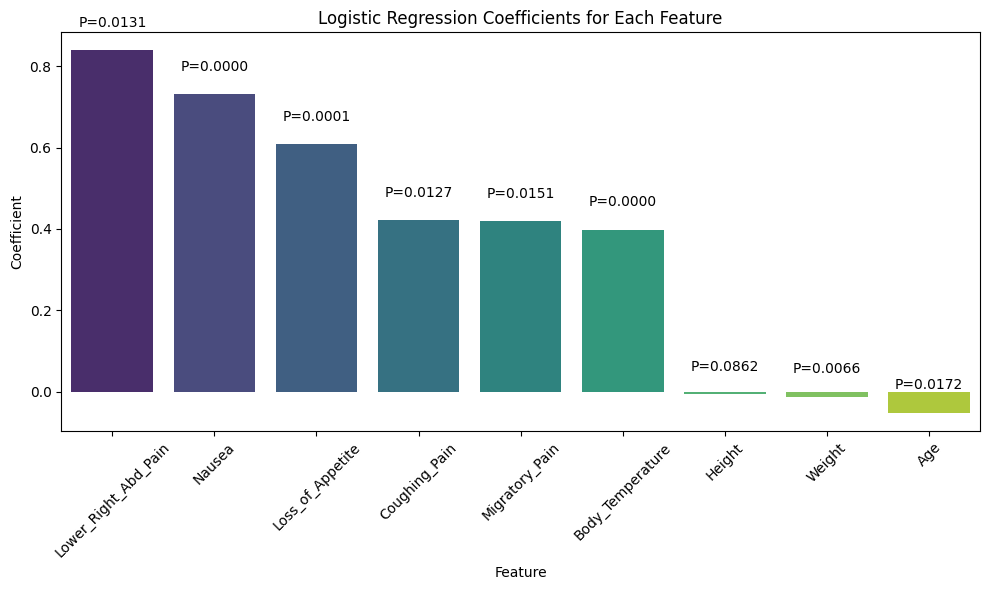

In [18]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')


# List of continuous columns and binary columns
continuous_cols = ['Age', 'Height', 'Weight', 'Body_Temperature']
binary_cols = ['Coughing_Pain', 'Migratory_Pain', 'Loss_of_Appetite', 'Nausea', 'Lower_Right_Abd_Pain']

# Function to run logistic regression for each feature and return coefficients and p-values
def logistic_regression_analysis(df, feature, target='Diagnosis'):
    # Add constant term for intercept
    X = df[[feature]]
    X = sm.add_constant(X)  # This adds the constant (intercept) term
    y = df[target]
    
    # Fit the logistic regression model
    model = sm.Logit(y, X)
    result = model.fit()
    
    # Return the summary of the model coefficients
    return result.params, result.pvalues

# Store results
results = {}

# Perform logistic regression for each continuous and binary column
for col in continuous_cols + binary_cols:
    params, pvalues = logistic_regression_analysis(df, col)
    results[col] = {'Coefficient': params[1], 'P-Value': pvalues[1]}  # We take index 1 for the feature coefficient

# Convert results to DataFrame for easier visualization
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by='Coefficient', ascending=False)  # Sort by coefficient

# Print regression results
print(results_df)

# Plot regression coefficients with p-values for each feature
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['Coefficient'], palette='viridis')

# Annotate p-values on top of bars
for i, pval in enumerate(results_df['P-Value']):
    plt.text(i, results_df['Coefficient'][i] + 0.05, f'P={pval:.4f}', ha='center', va='bottom')

plt.title('Logistic Regression Coefficients for Each Feature')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [21]:
df_final = df.drop(columns=['Age', 'Height', 'Weight', 'Sex'])

In [22]:
df_final.columns

Index(['Body_Temperature', 'Coughing_Pain', 'Migratory_Pain',
       'Loss_of_Appetite', 'Nausea', 'Lower_Right_Abd_Pain', 'Diagnosis'],
      dtype='object')

In [23]:
df_final.head()

,Body_Temperature,Coughing_Pain,Migratory_Pain,Loss_of_Appetite,Nausea,Lower_Right_Abd_Pain,Diagnosis
0,37.0,0.0,0.0,1.0,0.0,1.0,1.0
1,36.9,0.0,1.0,1.0,0.0,1.0,0.0
2,36.6,0.0,0.0,0.0,0.0,1.0,0.0
3,36.0,0.0,1.0,1.0,1.0,1.0,0.0
4,36.9,1.0,0.0,1.0,1.0,1.0,1.0


In [24]:
df_final.to_csv('appendicitis_symptoms.csv', index=False)

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('appendicitis_symptoms.csv')

X = df[['Body_Temperature', 'Coughing_Pain', 'Migratory_Pain', 
        'Loss_of_Appetite', 'Nausea', 'Lower_Right_Abd_Pain']]
y = df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
y_train.value_counts(True)

Diagnosis
1.0    0.574324
0.0    0.425676
Name: proportion, dtype: float64

In [4]:
y_test.value_counts(True)

Diagnosis
1.0    0.604027
0.0    0.395973
Name: proportion, dtype: float64

In [31]:
import tensorflow as tf
from tensorflow.keras import layers, models
import keras

model = models.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.4),  # Increased dropout to prevent overfitting
    
    layers.Dense(16, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    
    layers.Dense(8, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    
    layers.Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model with learning rate optimization
optimizer = keras.optimizers.AdamW(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4712 - loss: 0.9017 - val_accuracy: 0.5503 - val_loss: 0.6969
Epoch 2/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4768 - loss: 0.8742 - val_accuracy: 0.6107 - val_loss: 0.6915
Epoch 3/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4823 - loss: 0.8726 - val_accuracy: 0.5973 - val_loss: 0.6919
Epoch 4/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4774 - loss: 0.8175 - val_accuracy: 0.5973 - val_loss: 0.6928
Epoch 5/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5212 - loss: 0.8020 - val_accuracy: 0.5973 - val_loss: 0.6907
Epoch 6/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5769 - loss: 0.7624 - val_accuracy: 0.6040 - val_loss: 0.6895
Epoch 7/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5618 - loss: 0.7454 - val_accuracy: 0.6040 - val_loss: 0.6868
Epoch 8/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4927 - loss: 0.7908 - val_accuracy: 0.6040 - val_loss:

In [34]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6105 - loss: 0.6642 
Test Loss: 0.6625
Test Accuracy: 0.6309


In [10]:
import pickle

model.save('fnn.h5')
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [11]:
import numpy as np
import pickle

def predict_appendicitis(input_features):
    model = tf.keras.models.load_model("fnn.h5")
    scaler = pickle.load(open('scaler.pkl', 'rb'))
    input_array = np.array(input_features).reshape(1, -1)
    input_array = scaler.transform(input_array)
    prediction = model.predict(input_array)
    probability = prediction[0][0] * 100
    
    return f"The predicted probability of appendicitis is {probability:.2f}%."

input_features = [37.5, 1, 0, 1, 0, 0]  
print(predict_appendicitis(input_features))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
The predicted probability of appendicitis is 37.74%.


/Users/dipenshu/Desktop/Work/Qriocity/env/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
